In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pyplot

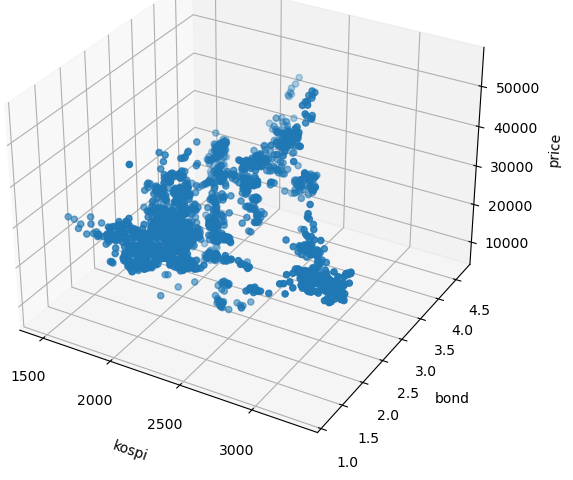

In [56]:
data = pd.read_csv("../data/final_fav_data.csv") # 기호품
# data = pd.read_csv("../data/final_ess_data.csv") # 생필품

x = data["코스피"]
y = data["채권"]
z = data["기호식품"]

col=['코스피',"채권"]
xy = pd.DataFrame(data, columns=col)

ax = pyplot.axes(projection='3d')
ax.set_xlabel('kospi')
ax.set_ylabel('bond')
ax.set_zlabel('price')
ax.dist=7
ax.scatter(x, y, z)
pyplot.show()


In [46]:
#리스트로 되어 있는 x와 y값을 넘파이 배열로 바꾸어 줍니다.(인덱스를 주어 하나씩 불러와 계산이 가능해 지도록 하기 위함입니다.)
x_data = np.array(x)
y_data = np.array(y)
z_data = np.array(z)

# 기울기 a와 절편 b의 값을 초기화 합니다.
a1 = 0
a2 = 0
b = 0

#학습률을 정합니다.
lr = 0.000000005

#몇 번 반복될지를 설정합니다.(0부터 세므로 원하는 반복 횟수에 +1을 해 주어야 합니다.)
epochs = 30

#경사 하강법을 시작합니다.
for i in range(epochs): # epoch 수 만큼 반복
    y_pred = a1 * x_data + a2 * y_data + b  #y를 구하는 식을 세웁니다
    error = z_data - y_pred  #오차를 구하는 식입니다.
    a1_diff = -(1/len(x_data)) * sum(x_data * (error)) # 오차함수를 a1로 미분한 값입니다. 
    a2_diff = -(1/len(y_data)) * sum(y_data * (error)) # 오차함수를 a2로 미분한 값입니다. 
    b_new = -(1/len(x_data)) * sum(z_data - y_pred)  # 오차함수를 b로 미분한 값입니다. 
    a1 = a1 - lr * a1_diff  # 학습률을 곱해 기존의 a1값을 업데이트합니다.
    a2 = a2 - lr * a2_diff  # 학습률을 곱해 기존의 a2값을 업데이트합니다.
    b = b - lr * b_new  # 학습률을 곱해 기존의 b값을 업데이트합니다.
    print("epoch=%.f, 기울기1=%.04f, 기울기2=%.04f, 절편=%.04f" % (i, a1, a2, b))

epoch=0, 기울기1=0.3286, 기울기2=0.0003, 절편=0.0001
epoch=1, 기울기1=0.6484, 기울기2=0.0006, 절편=0.0003
epoch=2, 기울기1=0.9596, 기울기2=0.0010, 절편=0.0004
epoch=3, 기울기1=1.2625, 기울기2=0.0013, 절편=0.0005
epoch=4, 기울기1=1.5572, 기울기2=0.0016, 절편=0.0007
epoch=5, 기울기1=1.8441, 기울기2=0.0018, 절편=0.0008
epoch=6, 기울기1=2.1233, 기울기2=0.0021, 절편=0.0009
epoch=7, 기울기1=2.3951, 기울기2=0.0024, 절편=0.0010
epoch=8, 기울기1=2.6595, 기울기2=0.0027, 절편=0.0012
epoch=9, 기울기1=2.9169, 기울기2=0.0029, 절편=0.0013
epoch=10, 기울기1=3.1673, 기울기2=0.0032, 절편=0.0014
epoch=11, 기울기1=3.4111, 기울기2=0.0034, 절편=0.0015
epoch=12, 기울기1=3.6483, 기울기2=0.0037, 절편=0.0016
epoch=13, 기울기1=3.8792, 기울기2=0.0039, 절편=0.0017
epoch=14, 기울기1=4.1039, 기울기2=0.0041, 절편=0.0018
epoch=15, 기울기1=4.3226, 기울기2=0.0043, 절편=0.0019
epoch=16, 기울기1=4.5354, 기울기2=0.0046, 절편=0.0020
epoch=17, 기울기1=4.7426, 기울기2=0.0048, 절편=0.0021
epoch=18, 기울기1=4.9441, 기울기2=0.0050, 절편=0.0022
epoch=19, 기울기1=5.1403, 기울기2=0.0052, 절편=0.0022
epoch=20, 기울기1=5.3312, 기울기2=0.0054, 절편=0.0023
epoch=21, 기울기1=5.5171, 기울기2=0.0056, 절편=0.002

In [81]:
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()
lr_model.fit(xy,z)
# print(f'w:{lr_model.coef_}, b:{lr_model.intercept_}')
print(f"kospi 기울기 : {lr_model.coef_[0]}")
print(f"bond 기울기 : {lr_model.coef_[1]}")
print(f"상수 : {lr_model.intercept_}")

kospi 기울기 : 4.007490796426654
bond 기울기 : 2355.523711998496
상수 : 14039.89573909822


In [77]:
def models(kospi,bond):
    z = kospi * lr_model.coef_[0] + bond * lr_model.coef_[1] + 14039
    return z

In [80]:
print(models(2293.61,4.255))

33253.37436014574
